In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('/content/Sample - Superstore.csv', encoding='latin1')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 21)

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4997.500000,2885.163629,1.000,2499.25000,4997.5000,7495.750,9994.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [7]:
# Select only numeric columns before calculating skewness
df.select_dtypes(include=np.number).skew()

,0
Row ID,0.000000
Postal Code,-0.128526
Sales,12.972752
Quantity,1.278545
Discount,1.684295
Profit,7.561432


Quick Skewness Summary:

If skewness ≈ 0, the data is symmetric.

If skewness > 1, the data is highly right-skewed (long tail on the right).

If skewness < -1, it's highly left-skewed (long tail on the left).

Row ID looks perfect — no skew at all.

Postal Code has a tiny skew to the left, nothing serious.

Sales, Profit are heavily skewed to the right, which means a few values are much higher than the rest.

Quantity and Discountis also skewed a bit to the right.



In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

Our dataset features consists of three datatypes
float
integer
object
Of which total numerical features are 6
And categorical features are 15.

In [9]:
#We'll be applying the same changes to df and test dataset.

features_to_change = ['Order Date' , 'Ship Date' ]


for feature in features_to_change:
    df[feature] = pd.to_datetime(df[feature])

In [11]:
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [12]:
df.isna().sum().sum()

np.int64(0)

In [46]:
missing = df.isna().sum()
missing = missing[missing > 0].sort_values()

if not missing.empty:
    fig, ax = plt.subplots(figsize=(10, len(missing)*0.4))
    bars = ax.barh(missing.index, missing.values, color='#89cff0')

    ax.set_xlabel('Missing')
    ax.set_title('Missing values per column')
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    ax.bar_label(bars, padding=3, color='blue')
    plt.tight_layout()
    plt.show()
else:
    print("Not Found Missing Values")


Not Found Missing Values


In [14]:
## What are the top selling products in the superstore?

df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
GBC Ibimaster 500 Manual ProClick Binding System,19024.500
Hewlett Packard LaserJet 3310 Copier,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
GBC DocuBind P400 Electric Binding System,17965.068


 ## ● Which category of products generates the highest revenue and profit?


In [15]:
df.groupby('Category')[['Sales' , 'Profit']].sum().sort_values(by = 'Sales' , ascending = False)

,Sales,Profit
Category,,
Technology,836154.0330,145454.9481
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008


In [17]:
df.groupby('Region')['Sales'].sum().sort_values(ascending = False).head(10)

,Sales
Region,
West,725457.8245
East,678781.2400
Central,501239.8908
South,391721.9050


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')



       ● What is the impact of discounts and promotions on sales?


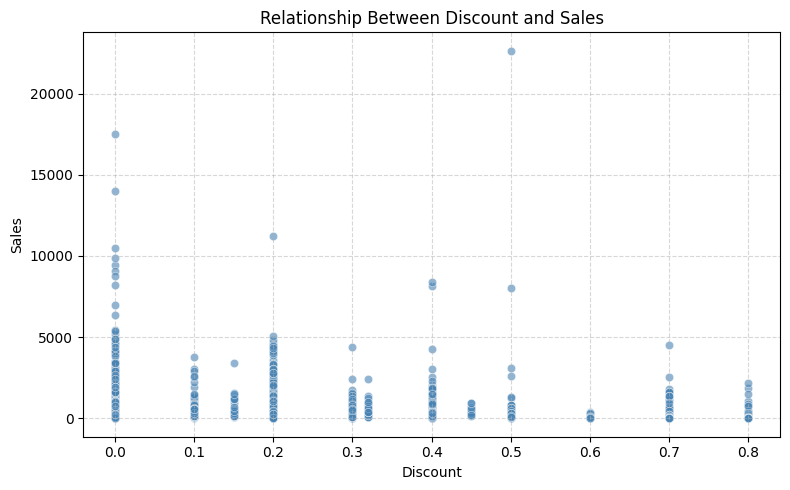

In [18]:
 ## ● What is the impact of discounts and promotions on sales?
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Discount', y='Sales', color='steelblue', alpha=0.6)

plt.title('Relationship Between Discount and Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## What is the average profit margin for each product category?
 ○ profit margin = profit/sales (consider it this way)

In [19]:
df['profit margin'] = df['Profit'] / df['Sales']

df.groupby('Category')['profit margin'].mean().sort_values()

,profit margin
Category,
Furniture,0.038784
Office Supplies,0.138030
Technology,0.156138


 ● Which sub-category of products has the highest demand?


In [20]:
df.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False).head(1)

,Quantity
Sub-Category,
Binders,5974


# Customer Analysis

Who are the top 10 customers in terms of total revenue?

Which customers generate the highest profit per order?

What customer segments are the most profitable?

Are there customers with consistent losses (negative profit)?



In [21]:
df.groupby('Customer Name')['Sales'].sum().sort_values(ascending = False).head(10)

,Sales
Customer Name,
Sean Miller,25043.050
Tamara Chand,19052.218
Raymond Buch,15117.339
Tom Ashbrook,14595.620
Adrian Barton,14473.571
Ken Lonsdale,14175.229
Sanjit Chand,14142.334
Hunter Lopez,12873.298
Sanjit Engle,12209.438


In [22]:
df.groupby(['Order ID' , 'Customer Name'])['Profit'].sum().sort_values(ascending = False).head(10)

,,Profit
Order ID,Customer Name,
CA-2016-118689,Tamara Chand,8762.3891
CA-2017-140151,Raymond Buch,6734.4720
CA-2017-166709,Hunter Lopez,5039.9856
CA-2016-117121,Adrian Barton,4946.3700
CA-2014-116904,Sanjit Chand,4668.6935
CA-2017-127180,Tom Ashbrook,4597.1657
CA-2015-145352,Christopher Martinez,3192.0682
CA-2016-158841,Sanjit Engle,2825.2862
US-2016-140158,Daniel Raglin,2640.4798


In [23]:
df.groupby('Segment')['Profit'].sum().sort_values(ascending = False)

,Profit
Segment,
Consumer,134119.2092
Corporate,91979.1340
Home Office,60298.6785


In [24]:
df[df['Profit'] < 0].groupby('Customer Name')['Profit'].sum().sort_values()

,Profit
Customer Name,
Cindy Stewart,-6904.3700
Grant Thornton,-4187.1078
Luke Foster,-3805.5490
Sharelle Roach,-3467.1258
Henry Goldwyn,-2998.8345
...,...
Sandra Flanagan,-1.0196
Pamela Coakley,-0.9900
Roland Schwarz,-0.9452


# Product Analysis

Which products have high sales but low profit margins?

Which products are being sold at a loss most frequently?

Which sub-categories have low sales and low demand — possibly overstocked?



In [30]:
product_df = df.groupby('Product Name')[['Sales', 'Profit']].sum()
product_df['Profit_Margin'] = product_df['Profit'] / product_df['Sales']

high_sales_low_margin = product_df[
    (product_df['Sales'] > product_df['Sales'].quantile(0.75)) &
    (product_df['Profit_Margin'] < 0.1)
]

high_sales_low_margin.sort_values(by='Sales', ascending=False).head(10)


,Sales,Profit,Profit_Margin
Product Name,,,
Cisco TelePresence System EX90 Videoconferencing Unit,22638.4800,-1.811078e+03,-8.000000e-02
HON 5400 Series Task Chairs for Big and Tall,21870.5760,5.684342e-14,2.599082e-18
GBC Ibimaster 500 Manual ProClick Binding System,19024.5000,7.609800e+02,4.000000e-02
GBC DocuBind P400 Electric Binding System,17965.0680,-1.878166e+03,-1.045455e-01
High Speed Automatic Electric Letter Opener,17030.3120,-2.620048e+02,-1.538462e-02
Lexmark MX611dhe Monochrome Laser Printer,16829.9010,-4.589973e+03,-2.727273e-01
Martin Yale Chadless Opener Electric Letter Opener,16656.2000,-1.299184e+03,-7.800000e-02
"Riverside Palais Royal Lawyers Bookcase, Royale Cherry Finish",15610.9656,-6.695448e+02,-4.288939e-02
Bretford Rectangular Conference Table Tops,12995.2915,-3.272331e+02,-2.518090e-02


In [33]:
df[df['Profit'] < 0]['Product Name'].value_counts().head(10)

,count
Product Name,
"Global Wood Trimmed Manager's Task Chair, Khaki",12
KI Adjustable-Height Table,10
"Global High-Back Leather Tilter, Burgundy",10
Hon 61000 Series Interactive Training Tables,9
"Premier Elliptical Ring Binder, Black",8
Storex Dura Pro Binders,8
Global Deluxe Steno Chair,8
Novimex Fabric Task Chair,8
Staple remover,8


In [34]:
df.groupby('Sub-Category')[['Sales', 'Quantity']].sum().sort_values(by='Sales')

,Sales,Quantity
Sub-Category,,
Fasteners,3024.2800,914
Labels,12486.3120,1400
Envelopes,16476.4020,906
Art,27118.7920,3000
Supplies,46673.5380,647
Paper,78479.2060,5178
Furnishings,91705.1640,3563
Appliances,107532.1610,1729
Bookcases,114879.9963,868


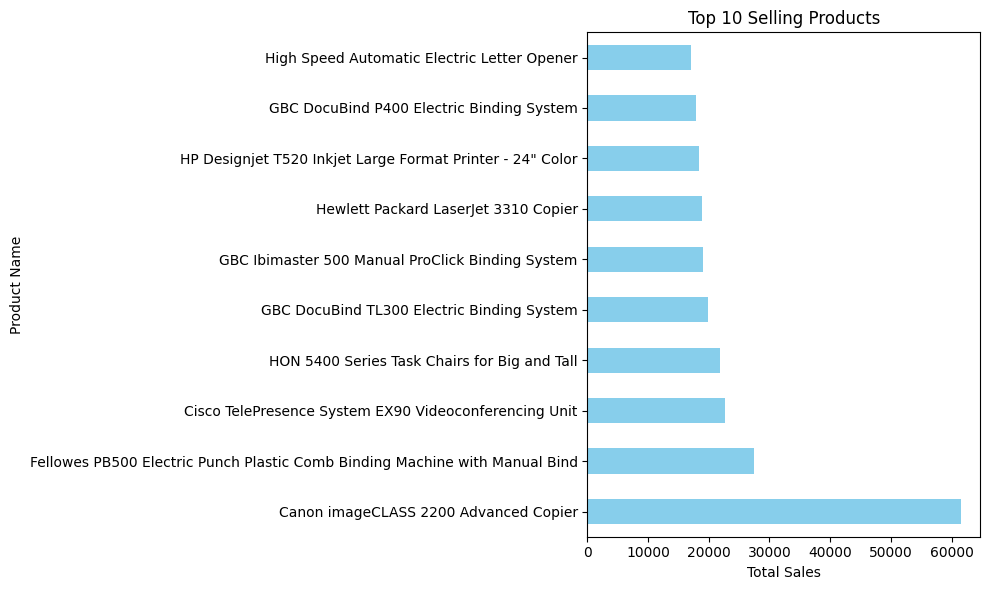

In [35]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='barh', color='skyblue', figsize=(10, 6))
plt.title('Top 10 Selling Products')
plt.xlabel('Total Sales')
plt.tight_layout()
plt.show()


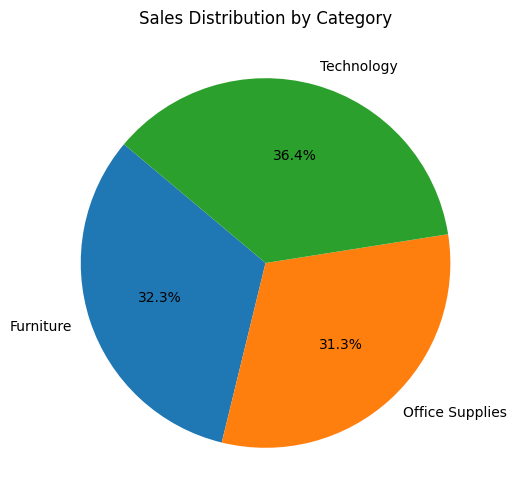

In [36]:
category_sales = df.groupby('Category')['Sales'].sum()

category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(6, 6))
plt.title('Sales Distribution by Category')
plt.ylabel('')
plt.show()


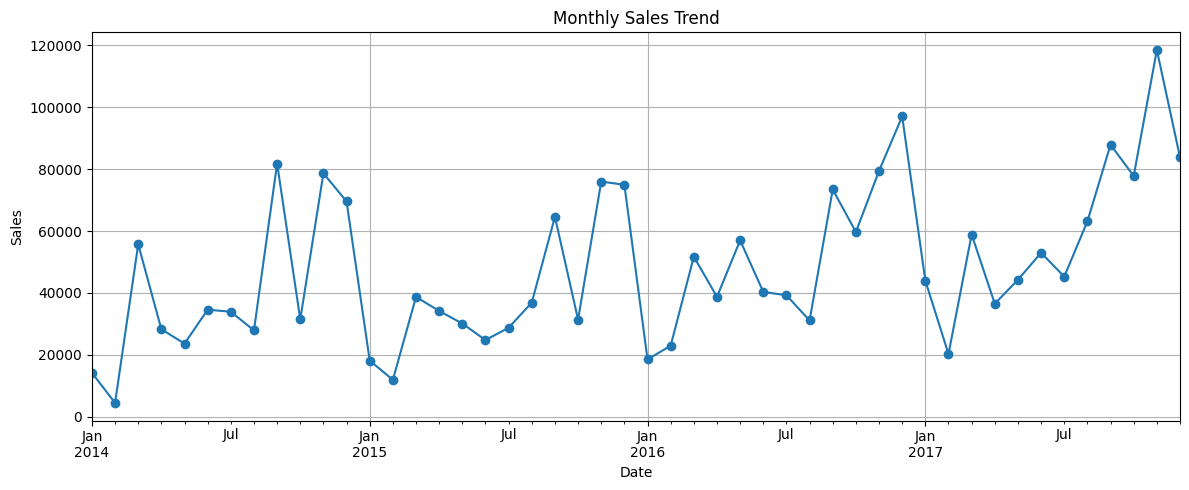

In [37]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()

monthly_sales.plot(kind='line', figsize=(12, 5), marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


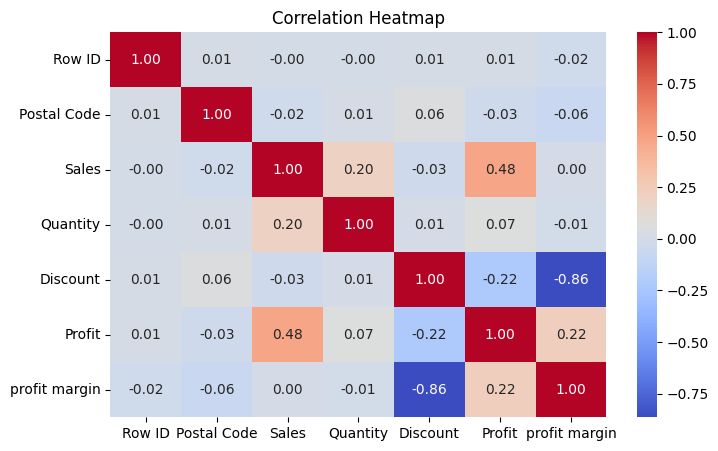

In [38]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


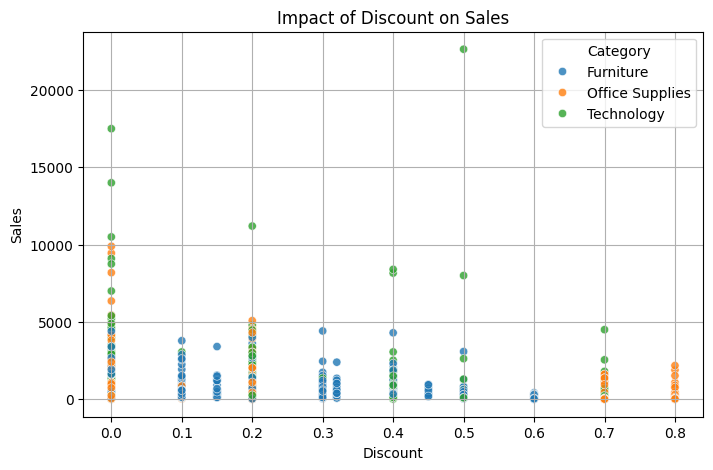

In [43]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Discount', y='Sales', hue='Category', alpha=0.8)
plt.title('Impact of Discount on Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Top 10 Cities by Sales')

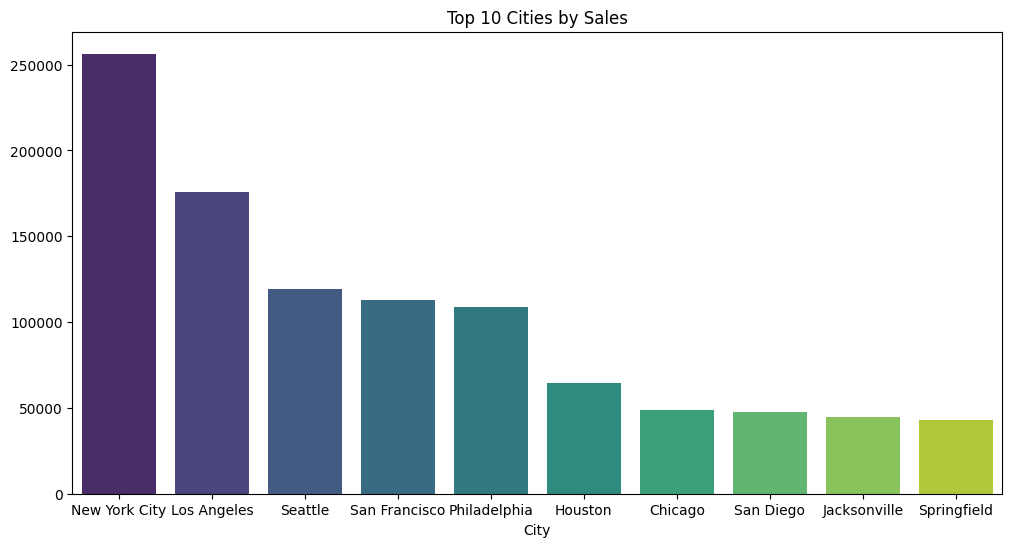

In [50]:
top_citys = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_citys.index, y=top_citys.values, palette='viridis')
plt.title('Top 10 Cities by Sales')